# Classify cell cycle

## 1. Load data 

This notebook allows classification based on known cell cycle markers using a variety of (semi-)supervised machine learning algorithms. First, load a few modules and specify the test file. Training and util files should remain as below. The hdf5 file containing the test data can be generated in R from a data frame using the write_hf.R function.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from __future__ import print_function
import h5py
import sys
import os
from os.path import exists
sys.path.append('../')
sys.path.append('../core')
import scipy as SP
from cyclone import cyclone
from load_data import *

CFG = {}
CFG['test_file'] = '../../data/data_mESCbulk.h5f'
#CFG['test_file'] = './data/normCounts_mESCquartz.h5f'
CFG['train_file'] = '../../data/normCountsBuettnerEtAl.h5f'
CFG['util_file'] = '../../data/normCounts_mESCquartz.h5f'

out_dir = './out_mESCbulk/'

Load data and show loaded variables. The data dictionary contains the full normalised read count marices for training and test file as well as a list of the respective gene names (either gene symbols or ENSEMBL - specify in the is_Ens option) and a list of cell cycle genes. In addition labels for traning and testing should be provided. 

In [3]:
data = load_data(CFG, is_Ens=True, het_only=True, het_onlyCB=False, gene_set='GOCB')#gene_set can be either a list of genes,
class_labels = data['class_labels']#['G1','G2M','S']#['T-cells']#d#['Liver']#['early', 'late', 'mid']#data['class_labels']#['G1', 'S','G2M']#['Liver']#[data['class_labels']#['T-cells']##['G1', 'S','G2M']#['T-cells']#['G1', 'S','G2M']# #                                                                                        #or 'all' (all genes), 'GOCB' GO and cyclebase or 'CB' or 'GO'
data.keys()

print(data['cc_ens'].shape[0], 'Cell cycle genes used for training and prediction')
print(data['class_labels'])

409 Cell cycle genes used for training and prediction
['Asy' 'G1' 'G2M' 'S']


The data required to build the model are loaded. Next, we initialise the model. 

In [4]:
cyclone = cyclone(data['Y'],row_namesY= data['genes'],cc_geneNames= data['cc_ens'],labels = data['labels'], 
                         Y_tst = data['Y_test'], row_namesY_tst = data['genes_tst'], labels_tst = data['labels_tst'])

Initialise model...


## 2. Train model

By default, a 10-fold corss-validation is performed on the training data to estimate the gernealizability of the gene set used for a number of classifers (PCA based, random forest, logistic regression, lasso and SVM (with rbf kernel)); then the model is trained on the entire data-set and applied to the test data-set. Once training and testing are completed, a plot with variable importances form the Random Forest method is shown together with a classification report in terms of precision and recall.

Performing cross validation ...
Fold 1 of 10
  Computing random forest ...
  Computing regularization path ...
Fold 2 of 10
  Computing random forest ...
  Computing regularization path ...
Fold 3 of 10
  Computing random forest ...
  Computing regularization path ...
Fold 4 of 10
  Computing random forest ...
  Computing regularization path ...
Fold 5 of 10
  Computing random forest ...
  Computing regularization path ...
Fold 6 of 10
  Computing random forest ...
  Computing regularization path ...
Fold 7 of 10
  Computing random forest ...
  Computing regularization path ...
Fold 8 of 10
  Computing random forest ...
  Computing regularization path ...
Fold 9 of 10
  Computing random forest ...
  Computing regularization path ...
Fold 10 of 10
  Computing random forest ...
  Computing regularization path ...
Final model
  Computing random forest ...
  Computing regularization path ...
Classification report for classifier Gaussian Naive Bayes:
             precision    recall  f1-sco

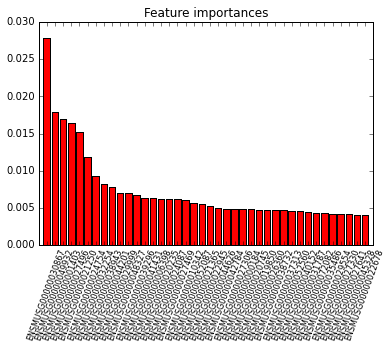

In [5]:
cyclone.trainModel(rftop = 40, cv=10, out_dir = out_dir, do_pca=1, npc=1, is_SVM=0)

## 3. Plot results

Results can be visualised in terms of barplots indicating the distributions of predicted cell cycle phases for the individual classes/labels in the test data (both int erms of absolute cells and as relative plot). In addition a barplot for the cross-validation results as well as cell-cycle phase specific ROC cruves are shown to make sure the model performs well in the cross-validation. 

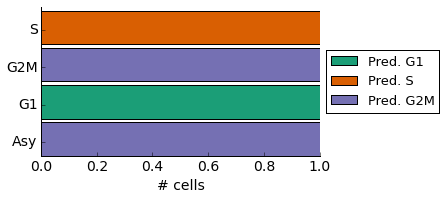

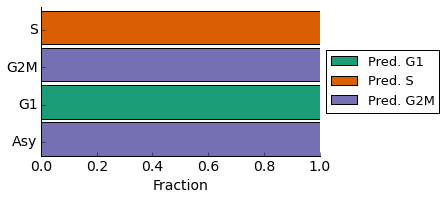

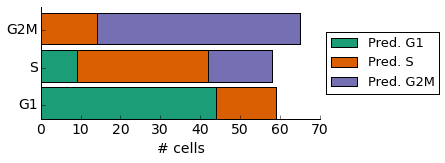

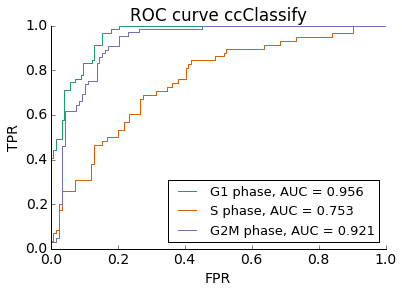

In [6]:
cyclone.plotHistograms(class_labels = class_labels, out_dir = out_dir, method='GNB', do_h=True)
cyclone.plotPerformance(plot_test=False, out_dir =out_dir, method='GNB')

In addition to the barplots the confidence of the classifier can be visualised in form of a scatter plot. By default, a scatter plot for the test data is shown; a scatter plot for the training data can be shown by setting the plot_test argument to False. The scores to be shown on the x- and y-axis can be chosen using the xaxis and yaxis argument.

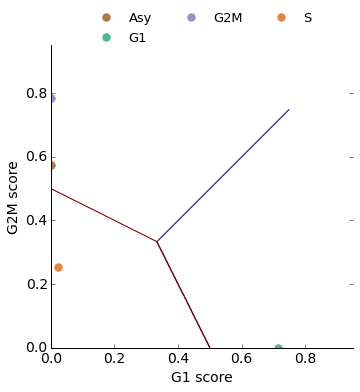

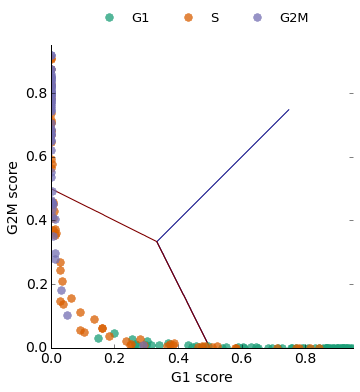

In [7]:
cyclone.plotScatter(plot_test = True, xaxis = 0, yaxis = 2, xlab = 'G1 score', ylab = 'G2M score', class_labels = class_labels, out_dir = out_dir, method='GNB')
cyclone.plotScatter(plot_test = False, xaxis = 0, yaxis = 2, xlab = 'G1 score', ylab = 'G2M score', class_labels = ['G1', 'S', 'G2M'], out_dir = out_dir, method='GNB')